In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [3]:
os.chdir('/Users/Daniel1020/Downloads')

In [5]:
credit_data= pd.read_csv('credit-data-training.csv')
customer_score = pd.read_csv('customers-to-score.csv')

In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
Credit-Application-Result            500 non-null object
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Duration-in-Current-address          156 non-null float64
Most-valuable-available-asset        500 non-null int64
Age-years                            488 non-null float64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 no

In [10]:
credit_data.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [11]:
credit_data.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


#### As we can see there are 344 nas for duration-in-current-address and 12 nas for age column, we will drop these records in our training dataset

In [14]:
credit_data = credit_data.drop('Duration-in-Current-address',axis=1)


KeyError: "['Duration-in-Current-address'] not found in axis"

In [15]:
credit_data = credit_data.dropna(subset=['Age-years'])

In [16]:
credit_data.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.0,488.000000,488.000000,488.000000
mean,21.485656,3213.676230,3.006148,2.370902,35.637295,1.932377,1.0,1.147541,1.401639,1.036885
std,12.246099,2850.136153,1.114568,1.058715,11.501522,0.537636,0.0,0.355008,0.490733,0.188673
min,4.000000,276.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.000000,1.000000,1.000000
25%,12.000000,1352.750000,2.000000,1.000000,27.000000,2.000000,1.0,1.000000,1.000000,1.000000
50%,18.000000,2239.500000,3.000000,3.000000,33.000000,2.000000,1.0,1.000000,1.000000,1.000000
75%,24.000000,3953.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.000000,2.000000,2.000000


In [26]:
customer_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Account-Balance                      500 non-null object
Duration-of-Credit-Month             500 non-null int64
Payment-Status-of-Previous-Credit    500 non-null object
Purpose                              500 non-null object
Credit-Amount                        500 non-null int64
Value-Savings-Stocks                 500 non-null object
Length-of-current-employment         500 non-null object
Instalment-per-cent                  500 non-null int64
Guarantors                           500 non-null object
Duration-in-Current-address          500 non-null int64
Most-valuable-available-asset        500 non-null int64
Age-years                            500 non-null int64
Concurrent-Credits                   500 non-null object
Type-of-apartment                    500 non-null int64
No-of-Credits-at-this-Bank           500 non-null object
Occupation                           500 non-nu

In [21]:
credit_data.describe().columns

Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'Occupation', 'No-of-dependents', 'Telephone', 'Foreign-Worker'],
      dtype='object')

In [22]:
target_name='Credit-Application-Result'
numeric_var=list(credit_data.describe().columns)

In [23]:
qualitative_var = list(credit_data.drop(numeric_var, axis=1).drop(target_name, axis=1).columns)

In [25]:
qualitative_var

['Account-Balance',
 'Payment-Status-of-Previous-Credit',
 'Purpose',
 'Value-Savings-Stocks',
 'Length-of-current-employment',
 'Guarantors',
 'Concurrent-Credits',
 'No-of-Credits-at-this-Bank']

In [43]:
numerical_data=credit_data[['Duration-of-Credit-Month','Credit-Amount','Instalment-per-cent','Most-valuable-available-asset']]

# Coorelation between numerical variables

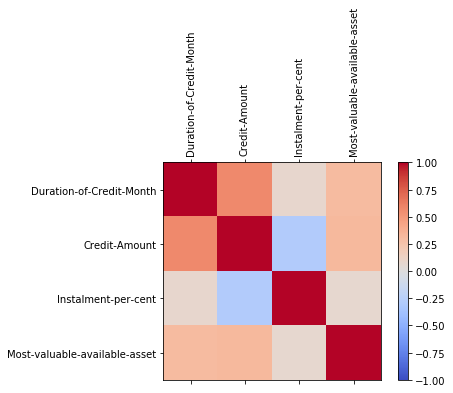

In [44]:
corr = numerical_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(numerical_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(numerical_data.columns)
ax.set_yticklabels(numerical_data.columns)
plt.show()

In [30]:
df_train_dummy = pd.get_dummies(credit_data)

In [33]:
df_train_dummy = df_train_dummy.drop(['Credit-Application-Result_Non-Creditworthy'], axis=1)

In [34]:

from sklearn.feature_selection import SelectKBest

In [35]:
selection = SelectKBest(k=5)

In [36]:
selection.fit(df_train_dummy.drop('Credit-Application-Result_Creditworthy', axis=1), df_train_dummy['Credit-Application-Result_Creditworthy'])

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 6 27] are constant.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=5, score_func=<function f_classif at 0x123438488>)

In [38]:
len(selection.scores_)

30

In [39]:
features = df_train_dummy.drop('Credit-Application-Result_Creditworthy', axis=1).columns

In [40]:
print(selection.scores_)

[2.11720829e+01 2.04594163e+01 2.08409600e+00 9.42344078e+00
 1.56950741e+00 2.32360194e-01            nan 7.32328245e-01
 3.62655258e-01 1.57337230e-02 5.47573609e+01 5.47573609e+01
 1.05883538e+01 7.55911199e-02 3.25885440e+01 2.97685318e+00
 5.11903426e+00 7.43702088e+00 6.97065904e-01 4.32022401e-01
 1.33339740e+01 1.19821127e+01 2.58030369e+00 1.29365877e+00
 5.15723769e+00 9.72916559e-01 9.72916559e-01            nan
 1.66167204e+00 1.66167204e+00]


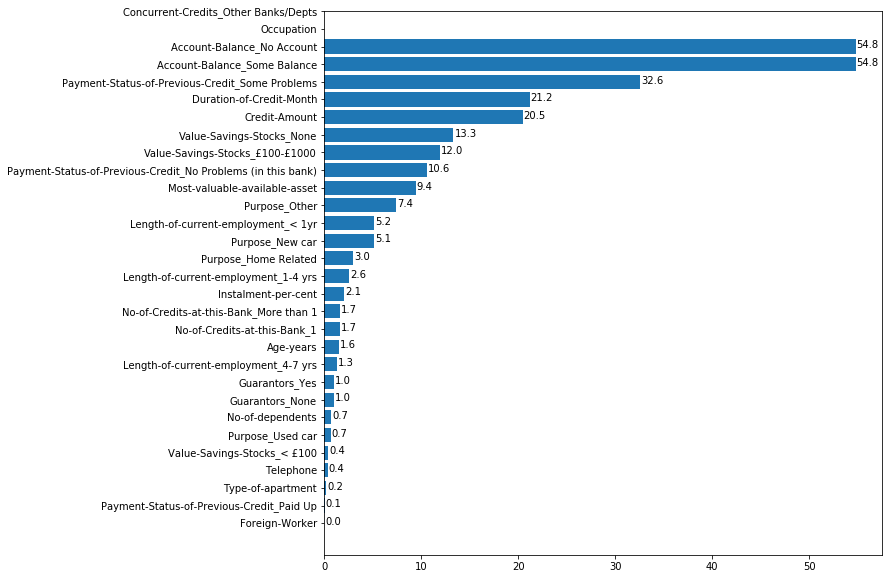

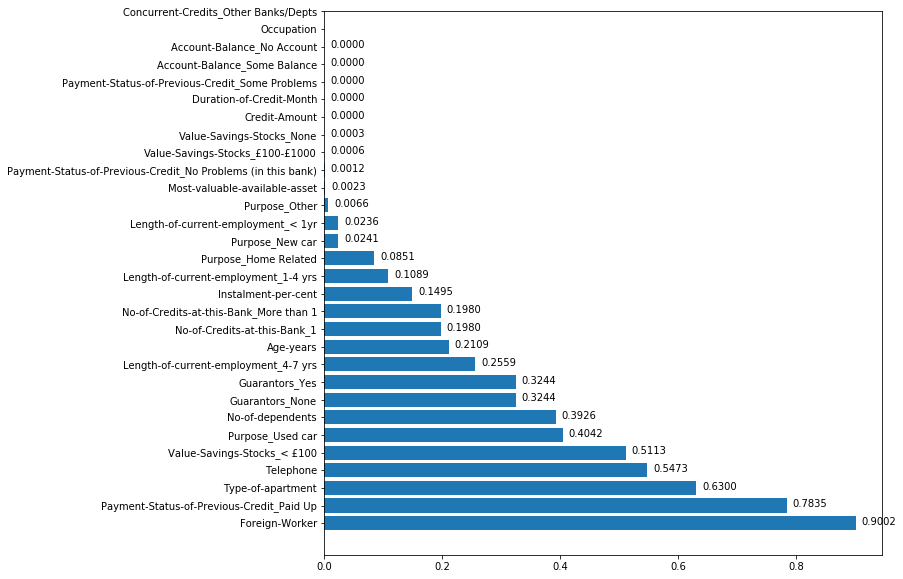

In [45]:

plt.figure(figsize=(10,10))
ax = plt.barh(np.arange(30), 
         selection.scores_[selection.scores_.argsort()], 
         tick_label=features[selection.scores_.argsort()])
for p in ax.patches:
    if ~np.isnan(p.get_width()):
        plt.text(x=p.get_width()+.1,
                 y=p.get_y()+.3,
                 s="%0.1f" % p.get_width())
plt.figure(figsize=(10,10))
ax = plt.barh(np.arange(30),
         selection.pvalues_[selection.scores_.argsort()],
         tick_label=features[selection.scores_.argsort()])
for p in ax.patches:
    if ~np.isnan(p.get_width()):
        plt.text(x=p.get_width()+.01,
                 y=p.get_y()+.3,
                 s="%0.4f" % p.get_width())

In [48]:

features_by_importance = features[selection.scores_.argsort()[::-1]]
p_values_by_importance = selection.pvalues_[selection.scores_.argsort()[::-1]]
use_features = []
for idx in range(len(features_by_importance)):
    if ~np.isnan(p_values_by_importance[idx]):
        if p_values_by_importance[idx] <= 0.15:
            use_features.append(features_by_importance[idx])
            print(features_by_importance[idx])

Account-Balance_No Account
Account-Balance_Some Balance
Payment-Status-of-Previous-Credit_Some Problems
Duration-of-Credit-Month
Credit-Amount
Value-Savings-Stocks_None
Value-Savings-Stocks_£100-£1000
Payment-Status-of-Previous-Credit_No Problems (in this bank)
Most-valuable-available-asset
Purpose_Other
Length-of-current-employment_< 1yr
Purpose_New car
Purpose_Home Related
Length-of-current-employment_1-4 yrs
Instalment-per-cent


In [49]:
use_features

['Account-Balance_No Account',
 'Account-Balance_Some Balance',
 'Payment-Status-of-Previous-Credit_Some Problems',
 'Duration-of-Credit-Month',
 'Credit-Amount',
 'Value-Savings-Stocks_None',
 'Value-Savings-Stocks_£100-£1000',
 'Payment-Status-of-Previous-Credit_No Problems (in this bank)',
 'Most-valuable-available-asset',
 'Purpose_Other',
 'Length-of-current-employment_< 1yr',
 'Purpose_New car',
 'Purpose_Home Related',
 'Length-of-current-employment_1-4 yrs',
 'Instalment-per-cent']

In [50]:
df_features = df_train_dummy[use_features]
df_labels = df_train_dummy['Credit-Application-Result_Creditworthy']
df_features.head()

,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Some Problems,Duration-of-Credit-Month,Credit-Amount,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Payment-Status-of-Previous-Credit_No Problems (in this bank),Most-valuable-available-asset,Purpose_Other,Length-of-current-employment_< 1yr,Purpose_New car,Purpose_Home Related,Length-of-current-employment_1-4 yrs,Instalment-per-cent
1,0,1,0,4,1494,0,1,0,1,0,1,0,1,0,1
2,0,1,0,4,1544,1,0,1,1,0,0,0,1,1,2
3,0,1,0,4,3380,1,0,1,1,0,0,0,1,1,1
4,1,0,0,6,343,1,0,0,1,0,1,0,1,0,4
5,0,1,0,6,362,0,0,1,3,0,1,0,1,0,4


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.3, random_state=0)

In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Logistic Regression")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifier: Logistic Regression
---------------------------------
Accuracy:	0.7551
Precision:	0.7623
Recall:		0.9300

              precision    recall  f1-score   support

           0       0.72      0.38      0.50        47
           1       0.76      0.93      0.84       100

    accuracy                           0.76       147
   macro avg       0.74      0.66      0.67       147
weighted avg       0.75      0.76      0.73       147

[[18 29]
 [ 7 93]]


In [54]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Random ForestClassifier")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Random ForestClassifier
---------------------------------
Accuracy:	0.7415
Precision:	0.7870
Recall:		0.8500

              precision    recall  f1-score   support

           0       0.62      0.51      0.56        47
           1       0.79      0.85      0.82       100

    accuracy                           0.74       147
   macro avg       0.70      0.68      0.69       147
weighted avg       0.73      0.74      0.73       147

[[24 23]
 [15 85]]


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Decision Tree")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Decision Tree
---------------------------------
Accuracy:	0.6190
Precision:	0.6964
Recall:		0.7800

              precision    recall  f1-score   support

           0       0.37      0.28      0.32        47
           1       0.70      0.78      0.74       100

    accuracy                           0.62       147
   macro avg       0.53      0.53      0.53       147
weighted avg       0.59      0.62      0.60       147

[[13 34]
 [22 78]]


In [56]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Support Vector Machine")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Support Vector Machine
---------------------------------
Accuracy:	0.4286
Precision:	0.7222
Recall:		0.2600

              precision    recall  f1-score   support

           0       0.33      0.79      0.47        47
           1       0.72      0.26      0.38       100

    accuracy                           0.43       147
   macro avg       0.53      0.52      0.43       147
weighted avg       0.60      0.43      0.41       147

[[37 10]
 [74 26]]


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier: Random ForestClassifier")
print('---------------------------------')
print("Accuracy:\t%0.4f" % accuracy_score(y_test, y_pred))
print("Precision:\t%0.4f" % precision_score(y_test, y_pred))
print("Recall:\t\t%0.4f" % recall_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classifier: Random ForestClassifier
---------------------------------
Accuracy:	0.7007
Precision:	0.7333
Recall:		0.8800

              precision    recall  f1-score   support

           0       0.56      0.32      0.41        47
           1       0.73      0.88      0.80       100

    accuracy                           0.70       147
   macro avg       0.64      0.60      0.60       147
weighted avg       0.68      0.70      0.67       147

[[15 32]
 [12 88]]
